In [56]:
!pip install ase

You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
from __future__ import print_function
import numpy as np
from ase import Atoms
from ase.units import eV, Ang, GPa
from files import Morse
calc = Morse.MorsePotential()
from ase.build import bulk
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

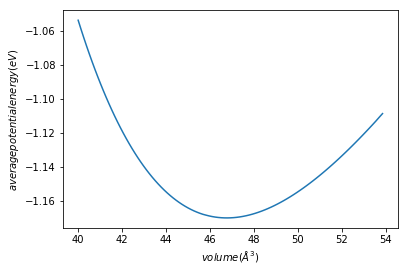

In [84]:
cu = bulk("Cu", "fcc", a=3.6, cubic=True) 
cu.set_calculator(calc)
cell = cu.get_cell()
volumes = []
energies = []

for i in range (100):
    cell *= 1+((i-50)/1000)
    cu.set_cell(cell, scale_atoms=True)
    volumes.append(cu.get_cell()[0][0]**3)
    energies.append(cu.get_potential_energy()/cu.get_number_of_atoms())
    cell *= 1/(1+((i-50)/1000))
   
plt.plot(volumes, energies)
plt.xlabel('$volume (Å^3)$')
plt.ylabel('$average potential energy (eV)$')
plt.show()

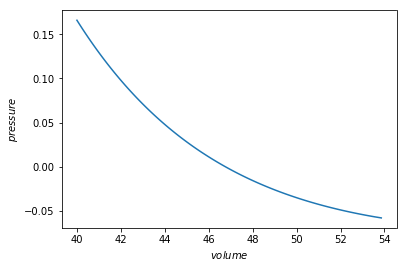

In [106]:
cu = bulk("Cu", "fcc", a=3.6, cubic=True) 
cu.set_calculator(calc)
cell = cu.get_cell()
volumes = []
pressures =[]

for i in range (100):
    cell *= 1+((i-50)/1000)
    cu.set_cell(cell, scale_atoms=True)
    volumes.append(cu.get_cell()[0][0]**3)
    pressures.append(-np.trace(cu.get_stress(voigt=False))/3)
    cell *= 1/(1+((i-50)/1000))

plt.plot(volumes, pressures)
plt.xlabel('$volume$')
plt.ylabel('$pressure$')
plt.show()

In [107]:
k = [0]*(len(volumes)-1)
ktot = 0
for i in range(len(k)):
    
    vdpbydv = ((volumes[i]+volumes[i+1])/2)*(pressures[i+1]-pressures[i])/(volumes[i+1]-volumes[i])
    ktot-=vdpbydv
    k[i] = - vdpbydv
   
print('Bulk modulus: ', (ktot/len(k))/ kJ * 1.0e24, 'GPa')    

Bulk modulus:  118.73838160731367 GPa
